In [ ]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sb

In [ ]:
products = pd.read_excel('/content/coffeeOrdersData.xlsx',sheet_name='products')
orders= pd.read_excel('/content/coffeeOrdersData.xlsx',sheet_name='orders')
customers = pd.read_excel('/content/coffeeOrdersData.xlsx',sheet_name='customers')

In [ ]:
df01 = pd.merge(products,orders)

In [ ]:
d_f = pd.merge(df01,customers)

In [ ]:
 d_f.columns

Index(['Product ID', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price',
       'Price per 100g', 'Profit', 'Order ID', 'Order Date', 'Month', 'Year',
       'Customer ID', 'Quantity', 'Customer Name', 'Email', 'Phone Number',
       'Address Line 1', 'City', 'Country', 'Postcode', 'Loyalty Card'],
      dtype='object')

In [ ]:
d_f.isnull().sum()

,0
Product ID,0
Coffee Type,0
Roast Type,0
Size,0
Unit Price,0
Price per 100g,0
Profit,0
Order ID,0
Order Date,0
Month,0


In [ ]:
d_f = d_f.drop(['Phone Number','Email'],axis=1)

In [ ]:
d_f.columns

Index(['Product ID', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price',
       'Price per 100g', 'Profit', 'Order ID', 'Order Date', 'Month', 'Year',
       'Customer ID', 'Quantity', 'Customer Name', 'Address Line 1', 'City',
       'Country', 'Postcode', 'Loyalty Card'],
      dtype='object')

In [ ]:
d_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product ID      1000 non-null   object        
 1   Coffee Type     1000 non-null   object        
 2   Roast Type      1000 non-null   object        
 3   Size            1000 non-null   float64       
 4   Unit Price      1000 non-null   float64       
 5   Price per 100g  1000 non-null   float64       
 6   Profit          1000 non-null   float64       
 7   Order ID        1000 non-null   object        
 8   Order Date      1000 non-null   datetime64[ns]
 9   Month           1000 non-null   object        
 10  Year            1000 non-null   int64         
 11  Customer ID     1000 non-null   object        
 12  Quantity        1000 non-null   int64         
 13  Customer Name   1000 non-null   object        
 14  Address Line 1  1000 non-null   object        
 15  City 

In [ ]:
d_f['Revenue'] = d_f['Unit Price'] * d_f['Quantity']

In [ ]:
d_f['Year'] = d_f['Year'].astype('object')

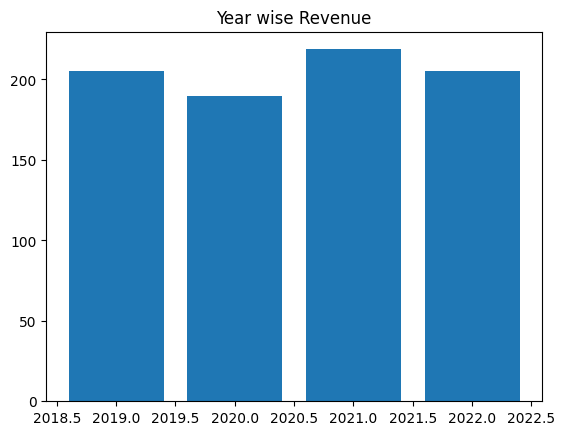

In [ ]:
pp.title('Year wise Revenue')
f1 = pp.bar(d_f['Year'],d_f['Revenue'])
# f1.bar_label(f1.containers[0])
pp.show()

In [ ]:
pd.pivot_table(d_f,index='Year',values='Revenue',aggfunc=['sum'])

,sum
,Revenue
Year,
2019,12187.165
2020,12117.545
2021,13766.110
2022,7063.435


In [ ]:
print("\tTOTAL REVENUE : ", d_f['Revenue'].sum())

	TOTAL REVENUE :  45134.25499999999


[Text(0, 0, '264'), Text(0, 0, '247'), Text(0, 0, '248'), Text(0, 0, '241')]

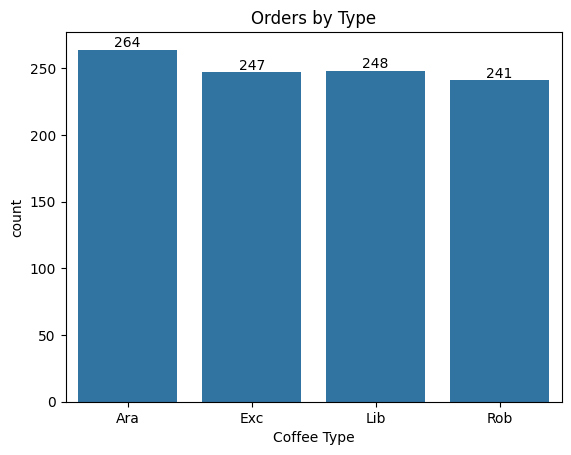

In [ ]:
pp.title('Orders by Type')
f2 = sb.countplot(x='Coffee Type',data=d_f)
f2.bar_label(f2.containers[0])

In [ ]:
d_f['Roast Type'].value_counts()

,count
Roast Type,
M,334
L,333
D,333


In [ ]:
def roast_type(r_type):
  if r_type == 'M':
    return 'Medium'
  elif r_type == 'L':
    return 'Light'
  else:
    return 'Dark'

In [ ]:
d_f['Roast Type'] = d_f['Roast Type'].apply(roast_type)

In [ ]:
d_f['Roast Type'].value_counts()

,count
Roast Type,
Medium,334
Light,333
Dark,333


In [ ]:
r_t = d_f.groupby('Roast Type').agg({'Roast Type':'count'})

([<matplotlib.patches.Wedge at 0x79c6699be200>,
 [Text(0.5509972750609822, 0.9520514707070057, 'Dark'),
  Text(-1.099994571861817, 0.003455701743252279, 'Light'),
  Text(0.5480036415915858, -0.9537777565042922, 'Medium')],
 [Text(0.3005439682150811, 0.5193008022038212, '33.30'),
  Text(-0.5999970391973546, 0.0018849282235921519, '33.30'),
  Text(0.298911077231774, -0.5202424126387047, '33.40')])

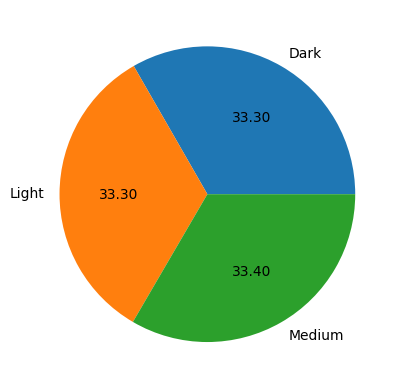

In [ ]:
pp.pie(r_t['Roast Type'],labels=r_t.index,autopct="%1.2f")

Text(0.5, 1.0, 'Orders by Month')

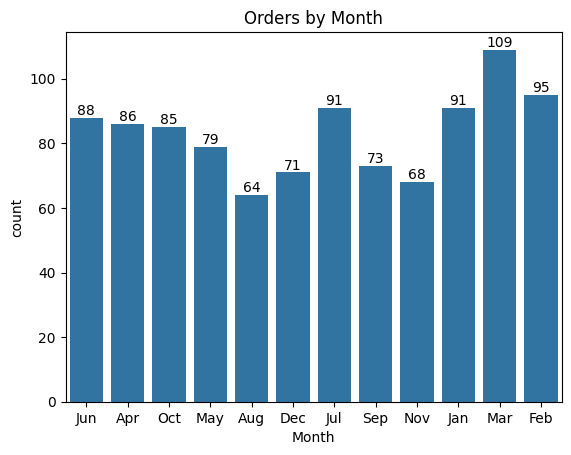

In [ ]:
f3= sb.countplot(x='Month',data=d_f)
f3.bar_label(f3.containers[0])
pp.title('Orders by Month')

In [ ]:
print("\tTOTAL PROFIT : " ,d_f['Profit'].sum())

	TOTAL PROFIT :  1301.37505


In [ ]:
print("\tTOTAL PROFIT MADE : ", (1301.37505/45134.255)*100,"%")

	TOTAL PROFIT MADE :  2.8833422640963056 %


<Axes: xlabel='Month', ylabel='count'>

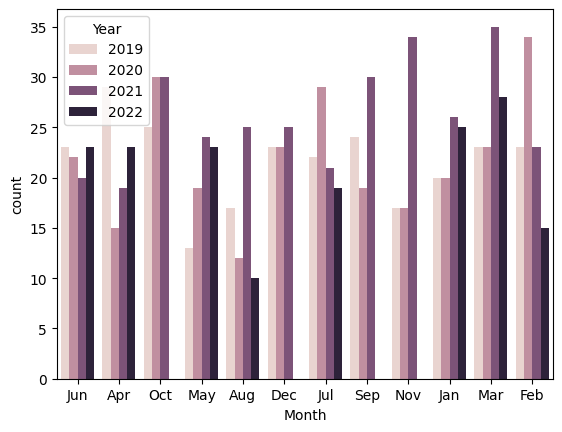

In [ ]:
sb.countplot(x='Month',hue='Year',data=d_f)

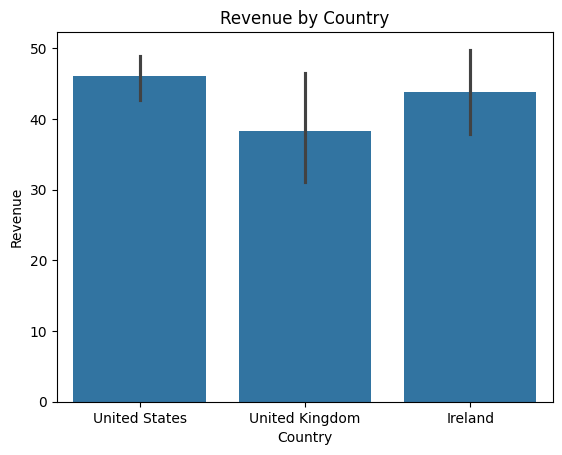

In [ ]:
pp.title('Revenue by Country')
f4 = sb.barplot(x='Country',y='Revenue',data=d_f)
# f4.bar_label(f4.containers[0])

In [ ]:
pd.pivot_table(d_f,index='Country',values='Revenue',aggfunc=['sum'])

,sum
,Revenue
Country,
Ireland,6696.865
United Kingdom,2798.505
United States,35638.885


In [ ]:
d_f[d_f.Country=='United States'].City.value_counts().head(10)

,count
City,
Washington,26
New York City,17
Oklahoma City,15
Houston,15
Los Angeles,11
El Paso,11
Dallas,11
Saint Louis,10
Sacramento,9


In [ ]:
usa = d_f[d_f.Country=='United States']

In [ ]:
pd.pivot_table(usa,index='City',values='Revenue',aggfunc=['sum'])

,sum
,Revenue
City,
Akron,37.980
Albany,399.240
Albuquerque,47.550
Alexandria,199.905
Alhambra,36.455
...,...
Wilmington,97.380
Winter Haven,16.500


In [ ]:
print("Washington"),
d_f[(d_f.Country=='United States')&(d_f.City=='Washington')].Revenue.sum()

Washington


1066.92

In [ ]:
print('New York City'),
d_f[(d_f.Country=='United States')&(d_f.City=='New York City')].Revenue.sum()

New York City


772.735

<Axes: ylabel='Country'>

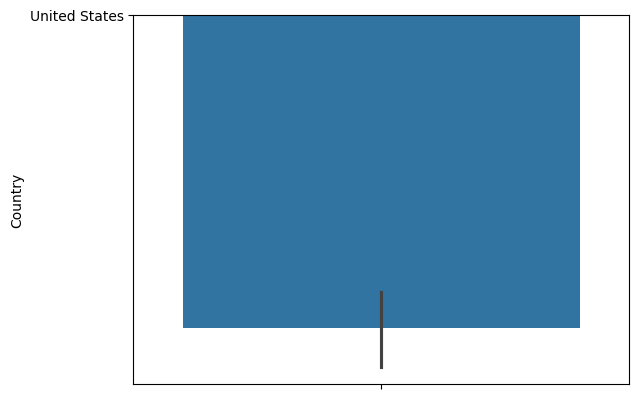

In [42]:
sb.barplot(y=d_f['Country],data=d_f)